In [160]:
#All necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn import svm

In [161]:
dataset = pd.read_csv('/content/Customer-Churn-Records.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [162]:
#removing rownumber, customerid , and surnames
dataset = dataset.drop(columns=['Surname'])
dataset = dataset.drop(columns=['CustomerId'])
dataset = dataset.drop(columns=['RowNumber'])
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [163]:
# Checking entries in 'HasCrCard' and changing corresponding entries in 'Card Type'
dataset.loc[dataset['HasCrCard'] == 0, 'Card Type'] = 'NA'
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,NA,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,NA,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,NA,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [164]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [165]:
dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


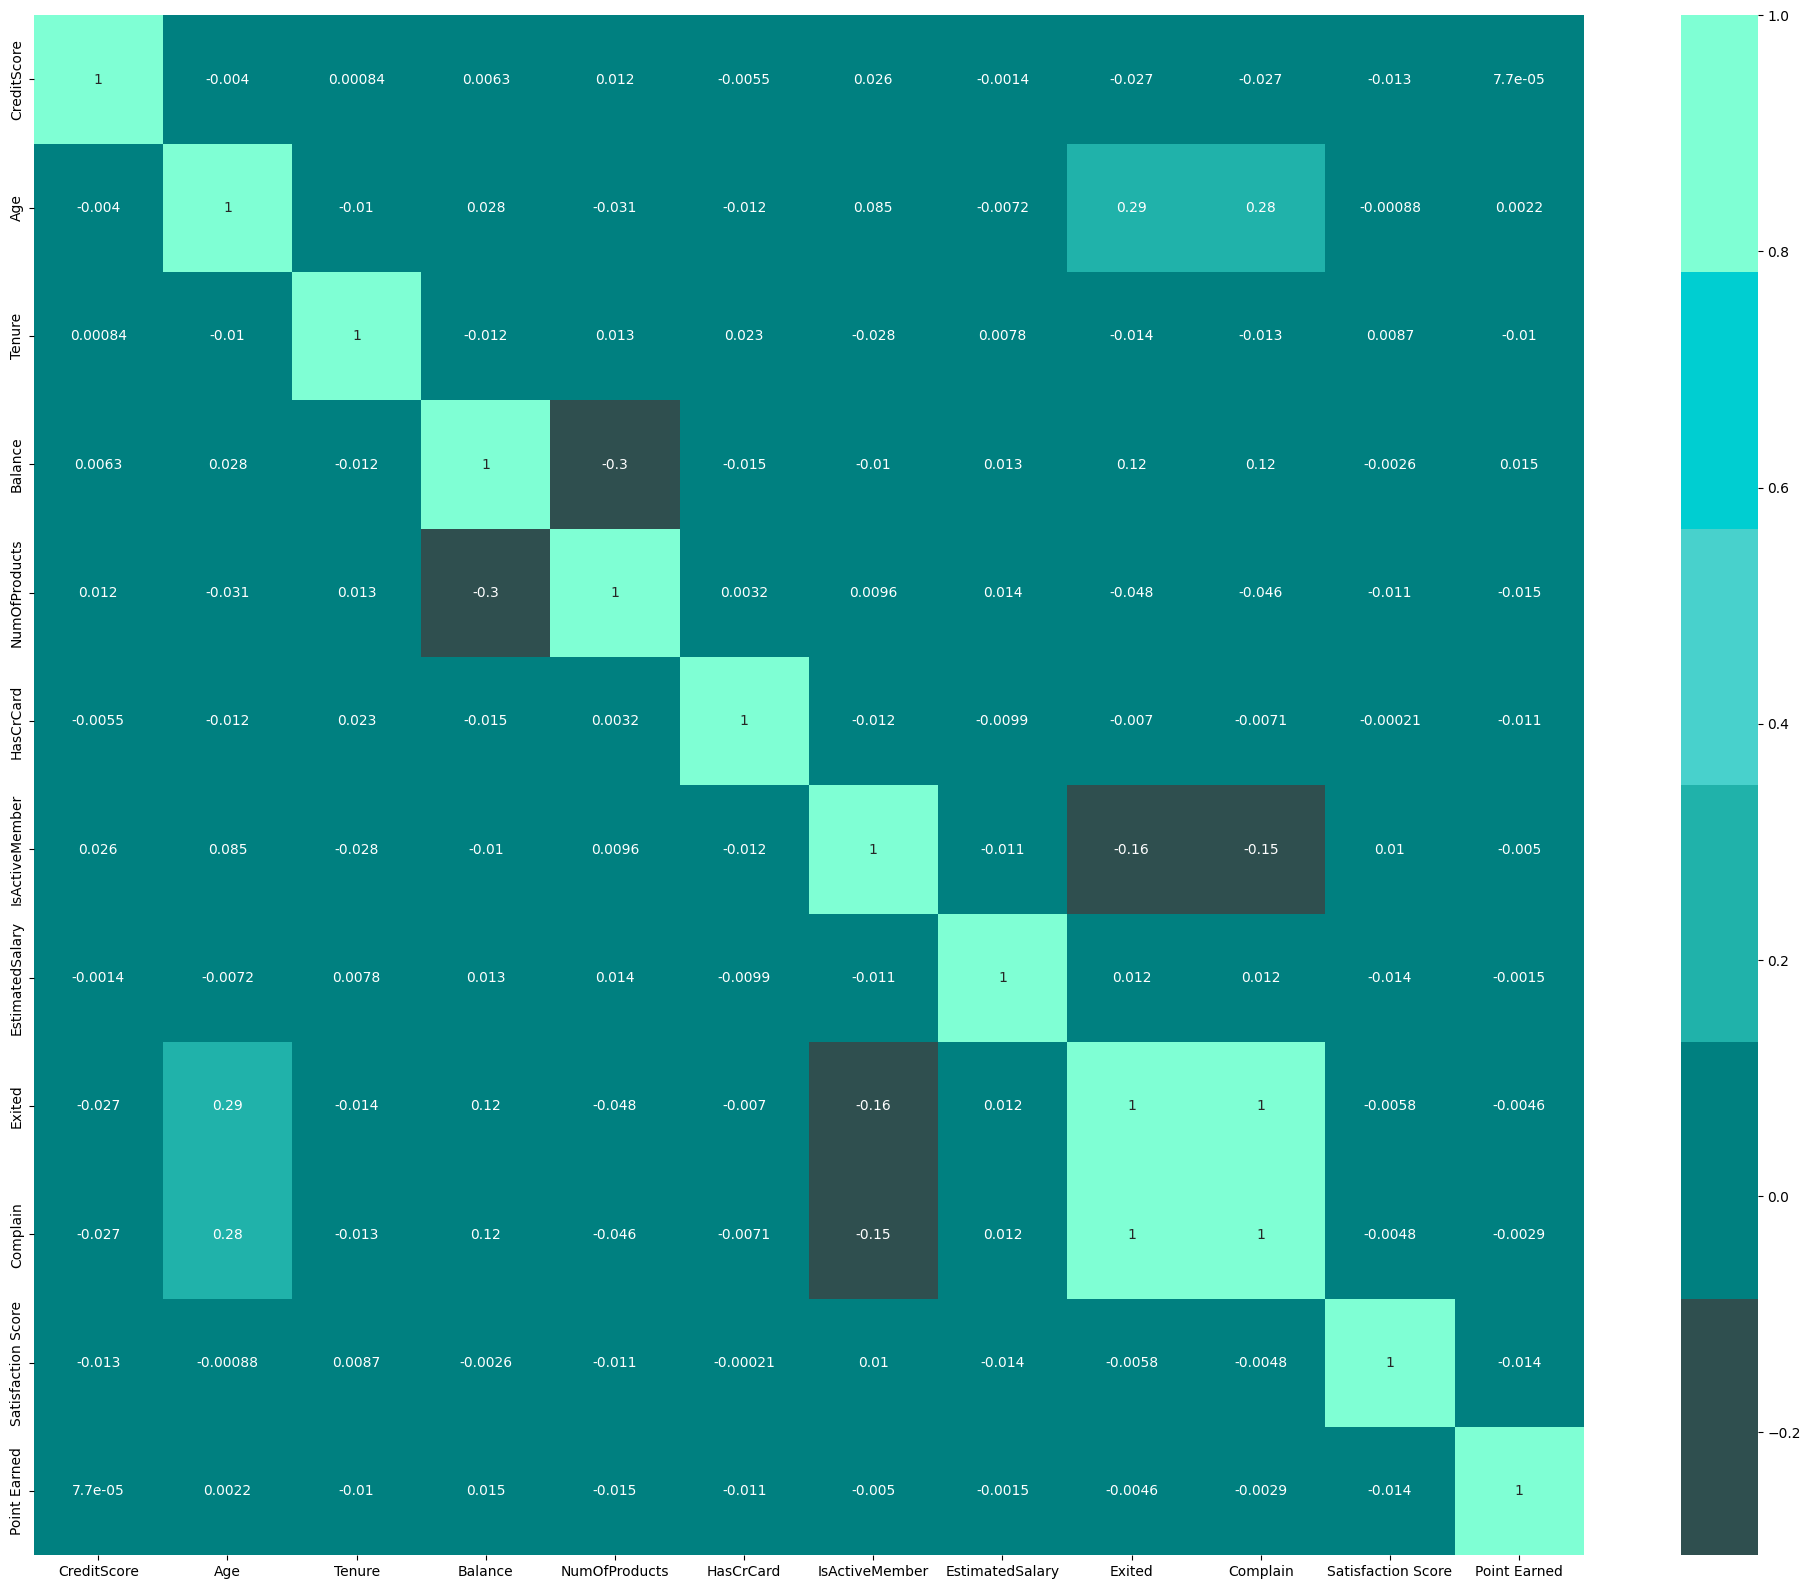

In [166]:
# List of columns to exclude
columns_to_exclude = ['Geography', 'Gender', 'Card Type']

# Create a copy of the DataFrame without the excluded columns
selected_columns = dataset.drop(columns=columns_to_exclude)

# Compute the correlation matrix for the selected columns
correlation_matrix = selected_columns.corr()

# Create a heatmap
plt.figure(figsize=(25, 20))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap=['#2F4F4F','#008080','#20B2AA','#48D1CC','#00CED1','#7FFFD4'])

# Show plot
plt.show()

<ipython-input-167-a1a4013b2ada>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Geography', palette = 'Set1', data = dataset)
<ipython-input-167-a1a4013b2ada>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Gender', palette = 'Set2', data = dataset)
<ipython-input-167-a1a4013b2ada>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Tenure', palette = 'Set3', data = dataset)
<ipython-input-167-a1a4013b2ada>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assig

<Axes: title={'center': 'Variable Card Type'}, xlabel='Card Type', ylabel='count'>

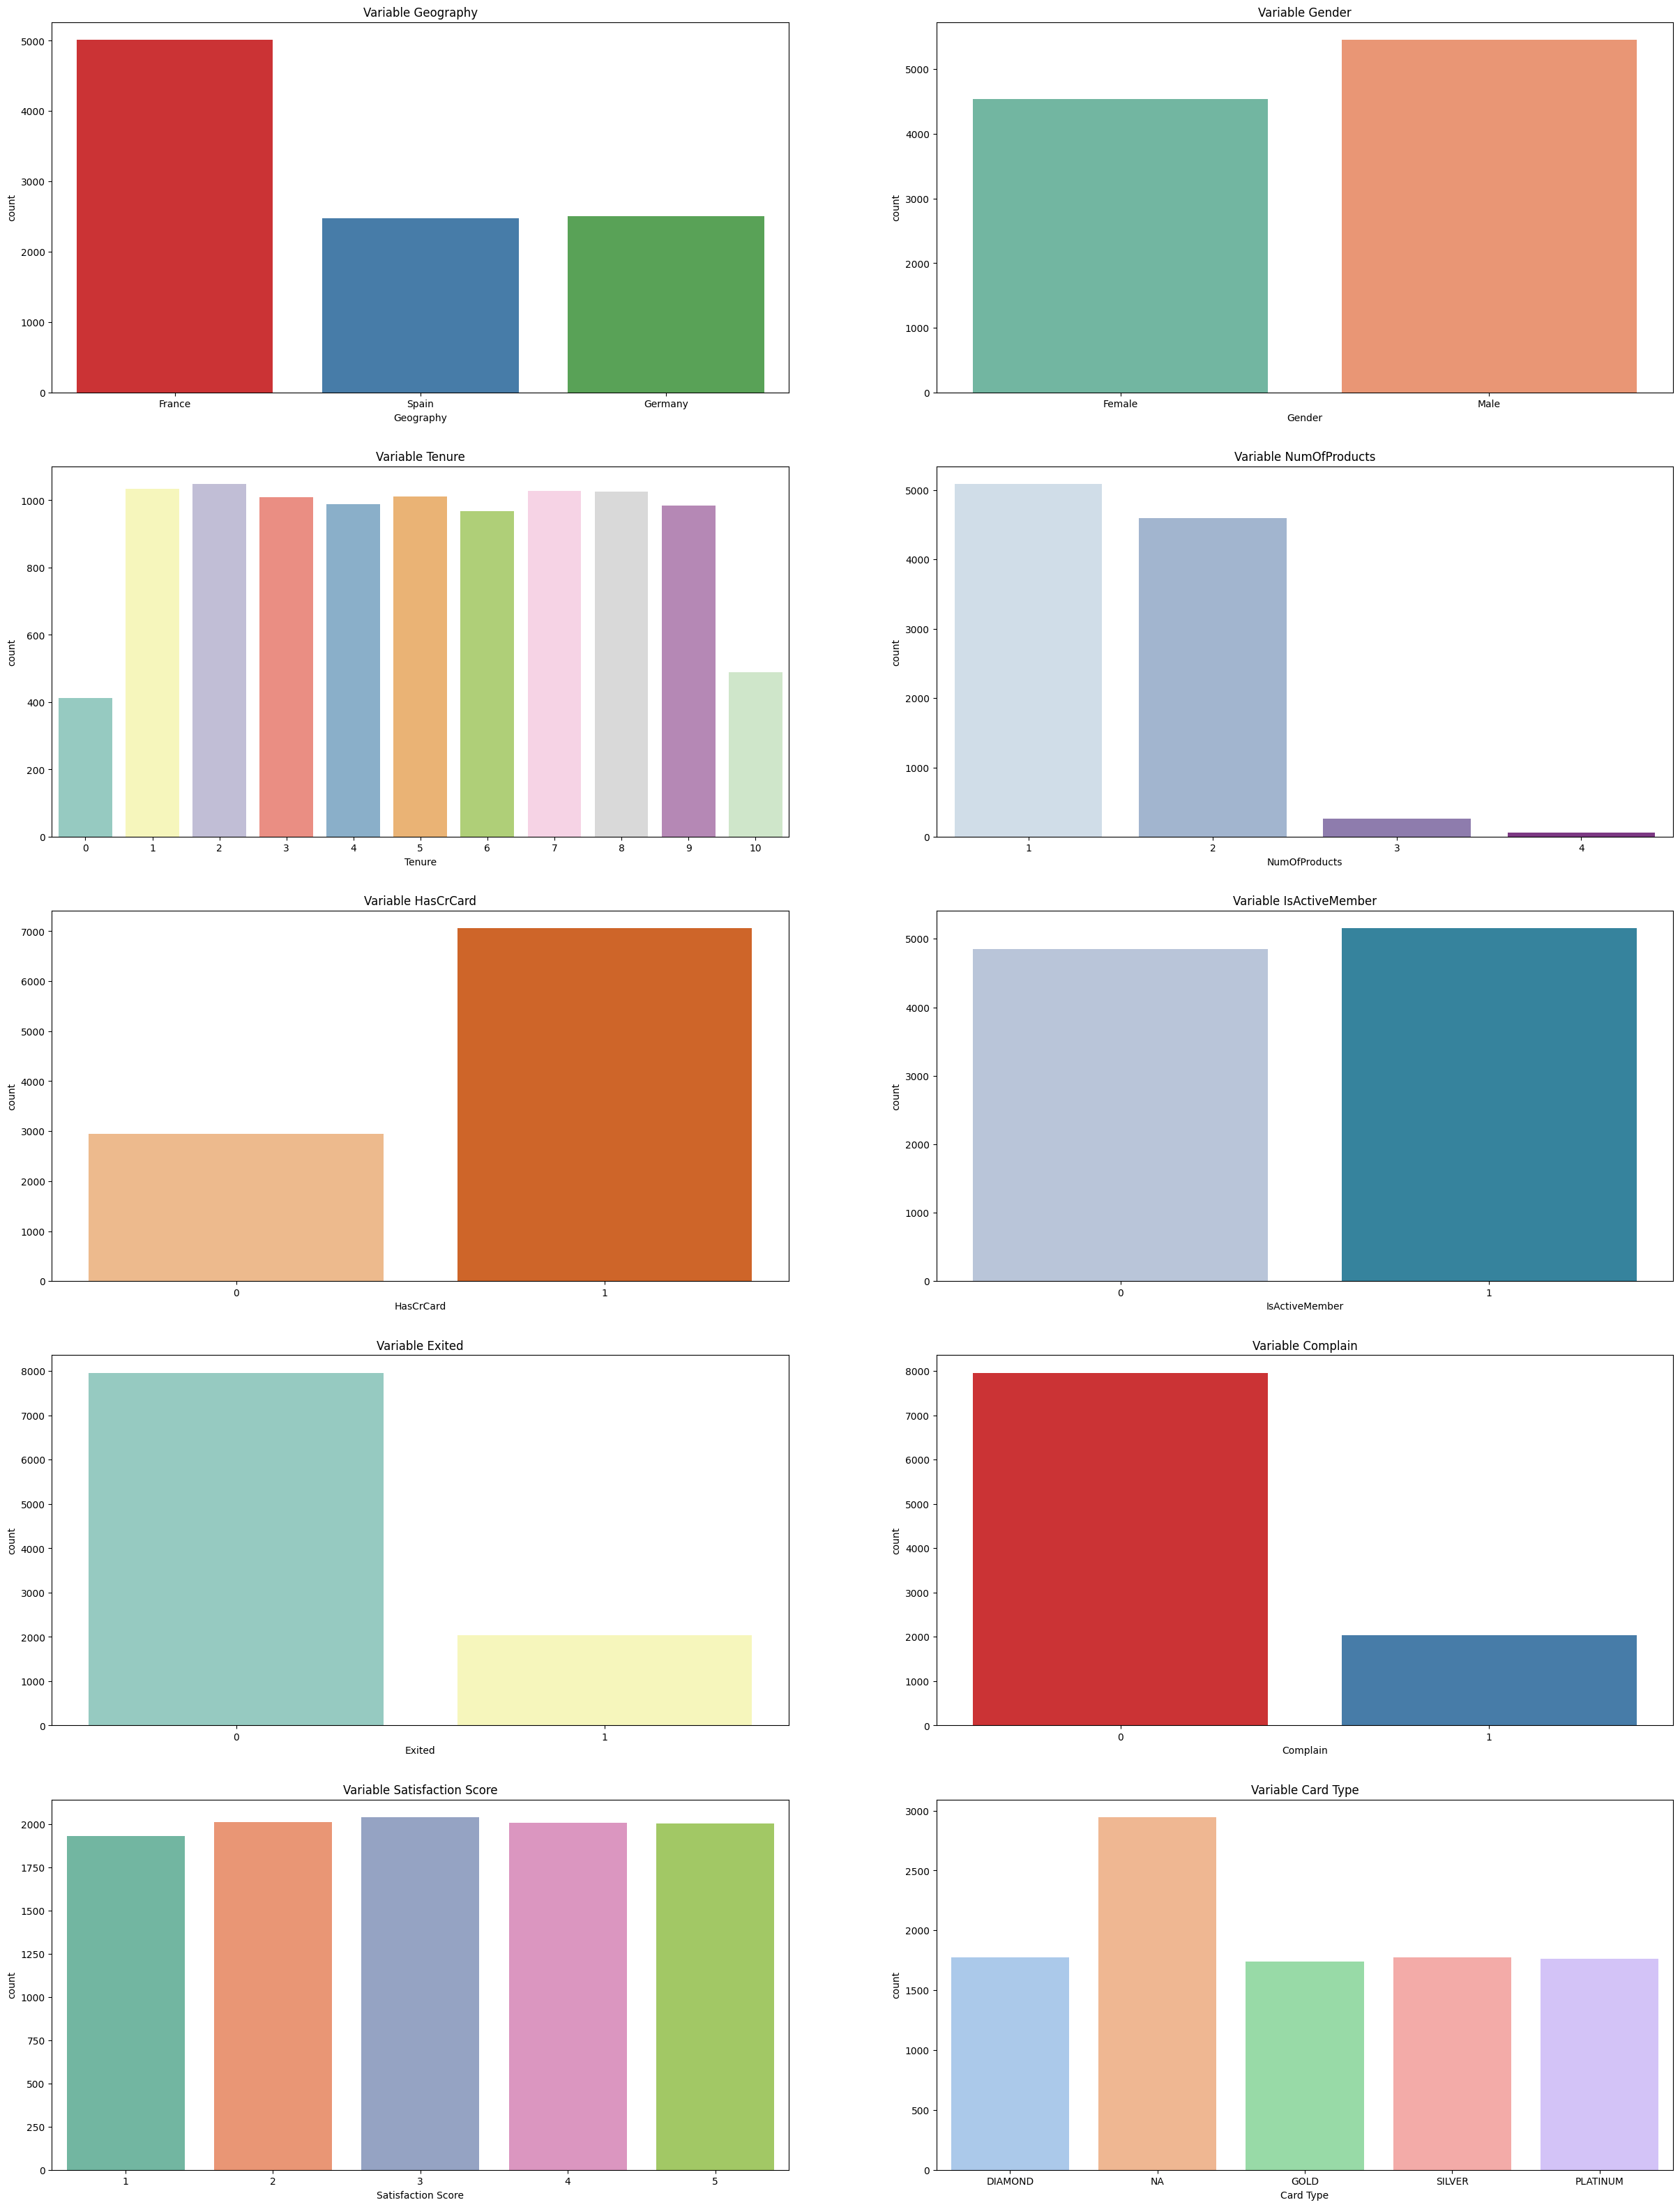

In [167]:
plt.figure(figsize = (30, 40))

plt.subplot(5, 2, 1)
plt.gca().set_title('Variable Geography')
sns.countplot(x = 'Geography', palette = 'Set1', data = dataset)

plt.subplot(5, 2, 2)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', palette = 'Set2', data = dataset)

plt.subplot(5, 2, 3)
plt.gca().set_title('Variable Tenure')
sns.countplot(x = 'Tenure', palette = 'Set3', data = dataset)

plt.subplot(5, 2, 4)
plt.gca().set_title('Variable NumOfProducts')
sns.countplot(x = 'NumOfProducts', palette = 'BuPu', data = dataset)

plt.subplot(5, 2, 5)
plt.gca().set_title('Variable HasCrCard')
sns.countplot(x = 'HasCrCard', palette = 'Oranges', data = dataset)

plt.subplot(5, 2, 6)
plt.gca().set_title('Variable IsActiveMember')
sns.countplot(x = 'IsActiveMember', palette = 'PuBuGn', data = dataset)

plt.subplot(5, 2, 7)
plt.gca().set_title('Variable Exited')
sns.countplot(x = 'Exited', palette = 'Set3', data = dataset)

plt.subplot(5, 2, 8)
plt.gca().set_title('Variable Complain')
sns.countplot(x = 'Complain', palette = 'Set1', data = dataset)

plt.subplot(5, 2, 9)
plt.gca().set_title('Variable Satisfaction Score')
sns.countplot(x = 'Satisfaction Score', palette = 'Set2', data = dataset)

plt.subplot(5, 2, 10)
plt.gca().set_title('Variable Card Type')
sns.countplot(x = 'Card Type', palette = 'pastel', data = dataset)

<Axes: xlabel='Point Earned', ylabel='Count'>

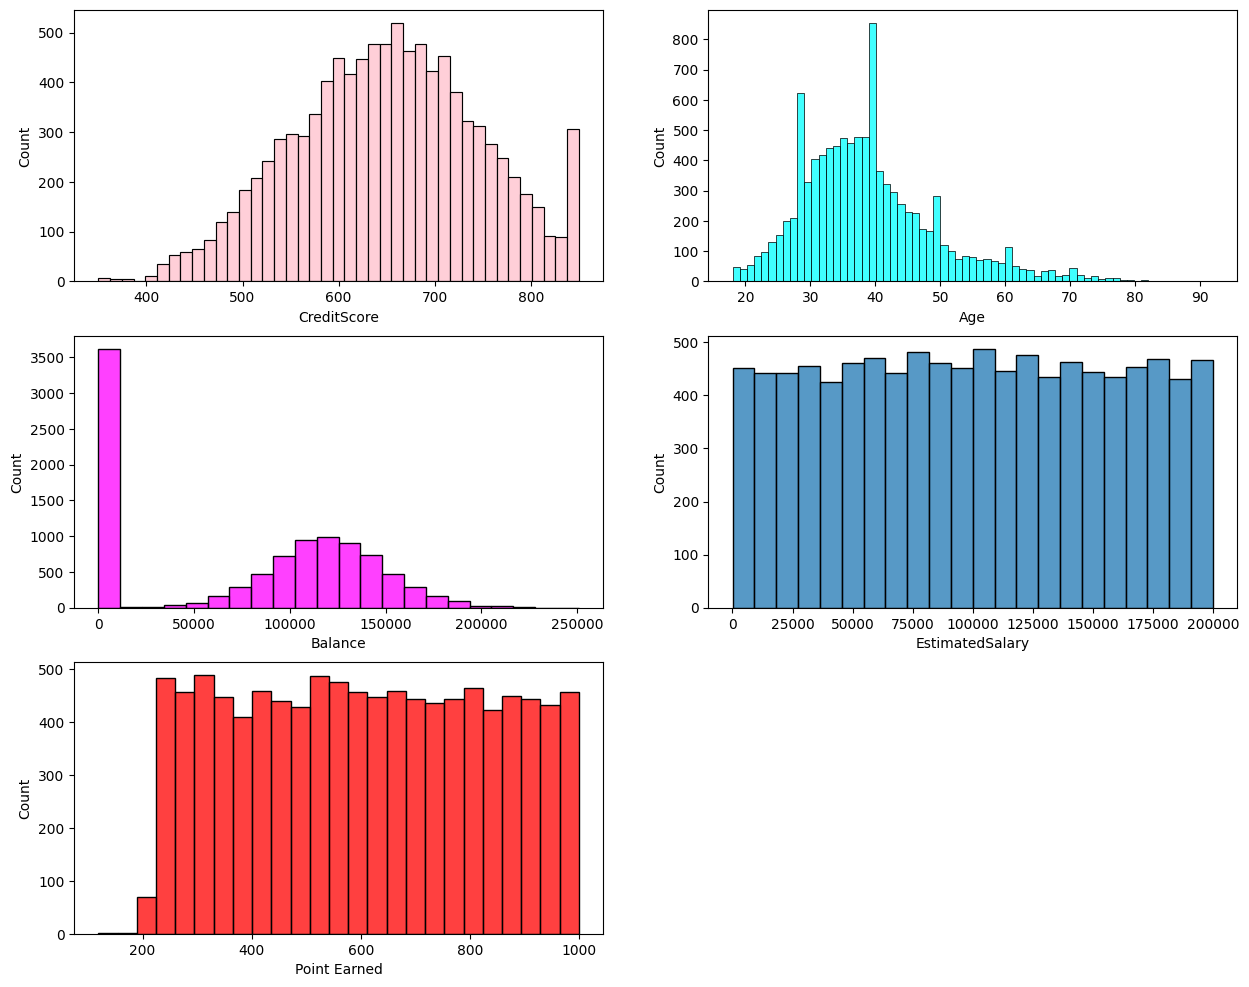

In [168]:
plt.figure(figsize = (15, 12))

plt.subplot(3, 2, 1)
sns.histplot(x = dataset['CreditScore'], kde = False, color='pink')

plt.subplot(3, 2, 2)
sns.histplot(x = dataset['Age'], kde = False, color= 'cyan')

plt.subplot(3, 2, 3)
sns.histplot(x = dataset['Balance'], kde = False, color='magenta')

plt.subplot(3, 2, 4)
sns.histplot(x = dataset['EstimatedSalary'], kde = False)

plt.subplot(3, 2, 5)
sns.histplot(x = dataset['Point Earned'], kde = False, color='red')

<Axes: title={'center': 'Boxplot CreditScore'}, xlabel='CreditScore'>

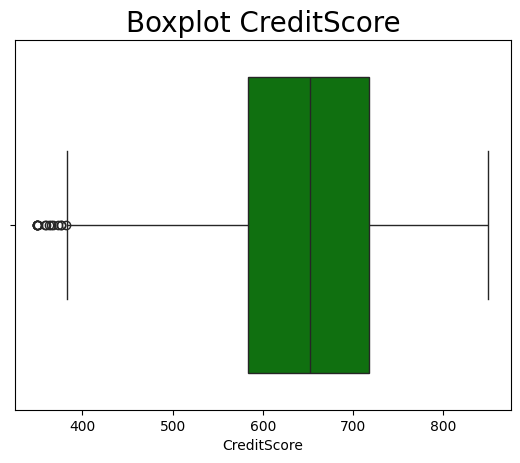

In [169]:
plt.title("Boxplot CreditScore", fontdict = {'fontsize': 20})
sns.boxplot(x=dataset["CreditScore"], color='green')

<Axes: title={'center': 'Boxplot Age'}, xlabel='Age'>

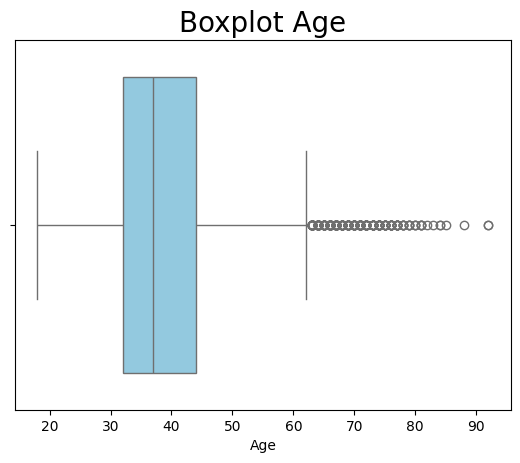

In [170]:
plt.title("Boxplot Age", fontdict = {'fontsize': 20})
sns.boxplot(x=dataset["Age"], color='skyblue')

<Axes: title={'center': 'Boxplot Balance'}, xlabel='Balance'>

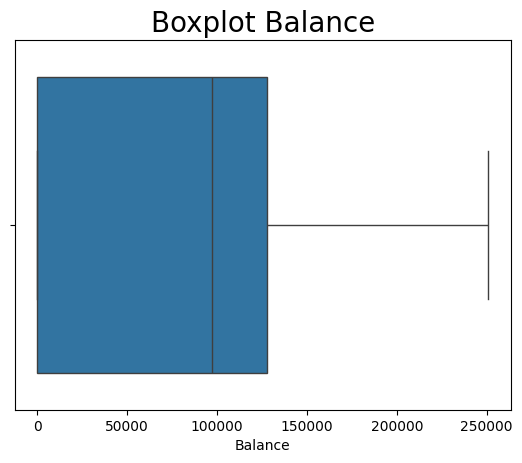

In [171]:
plt.title("Boxplot Balance", fontdict = {'fontsize': 20})
sns.boxplot(x=dataset["Balance"])

<Axes: title={'center': 'Boxplot EstimatedSalary'}, xlabel='EstimatedSalary'>

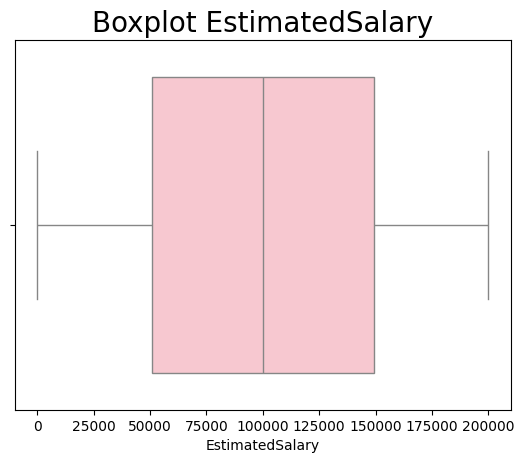

In [172]:
plt.title("Boxplot EstimatedSalary", fontdict = {'fontsize': 20})
sns.boxplot(x=dataset["EstimatedSalary"], color='pink')

<Axes: title={'center': 'Boxplot Point Earned'}, xlabel='Point Earned'>

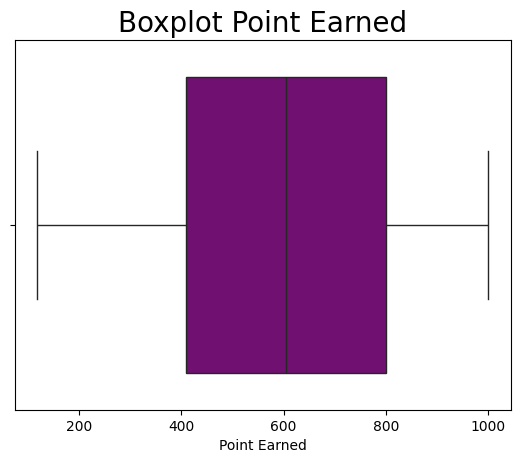

In [173]:
plt.title("Boxplot Point Earned", fontdict = {'fontsize': 20})
sns.boxplot(x=dataset["Point Earned"], color='purple')

<Axes: title={'center': 'Variable Card Type'}, xlabel='Card Type', ylabel='count'>

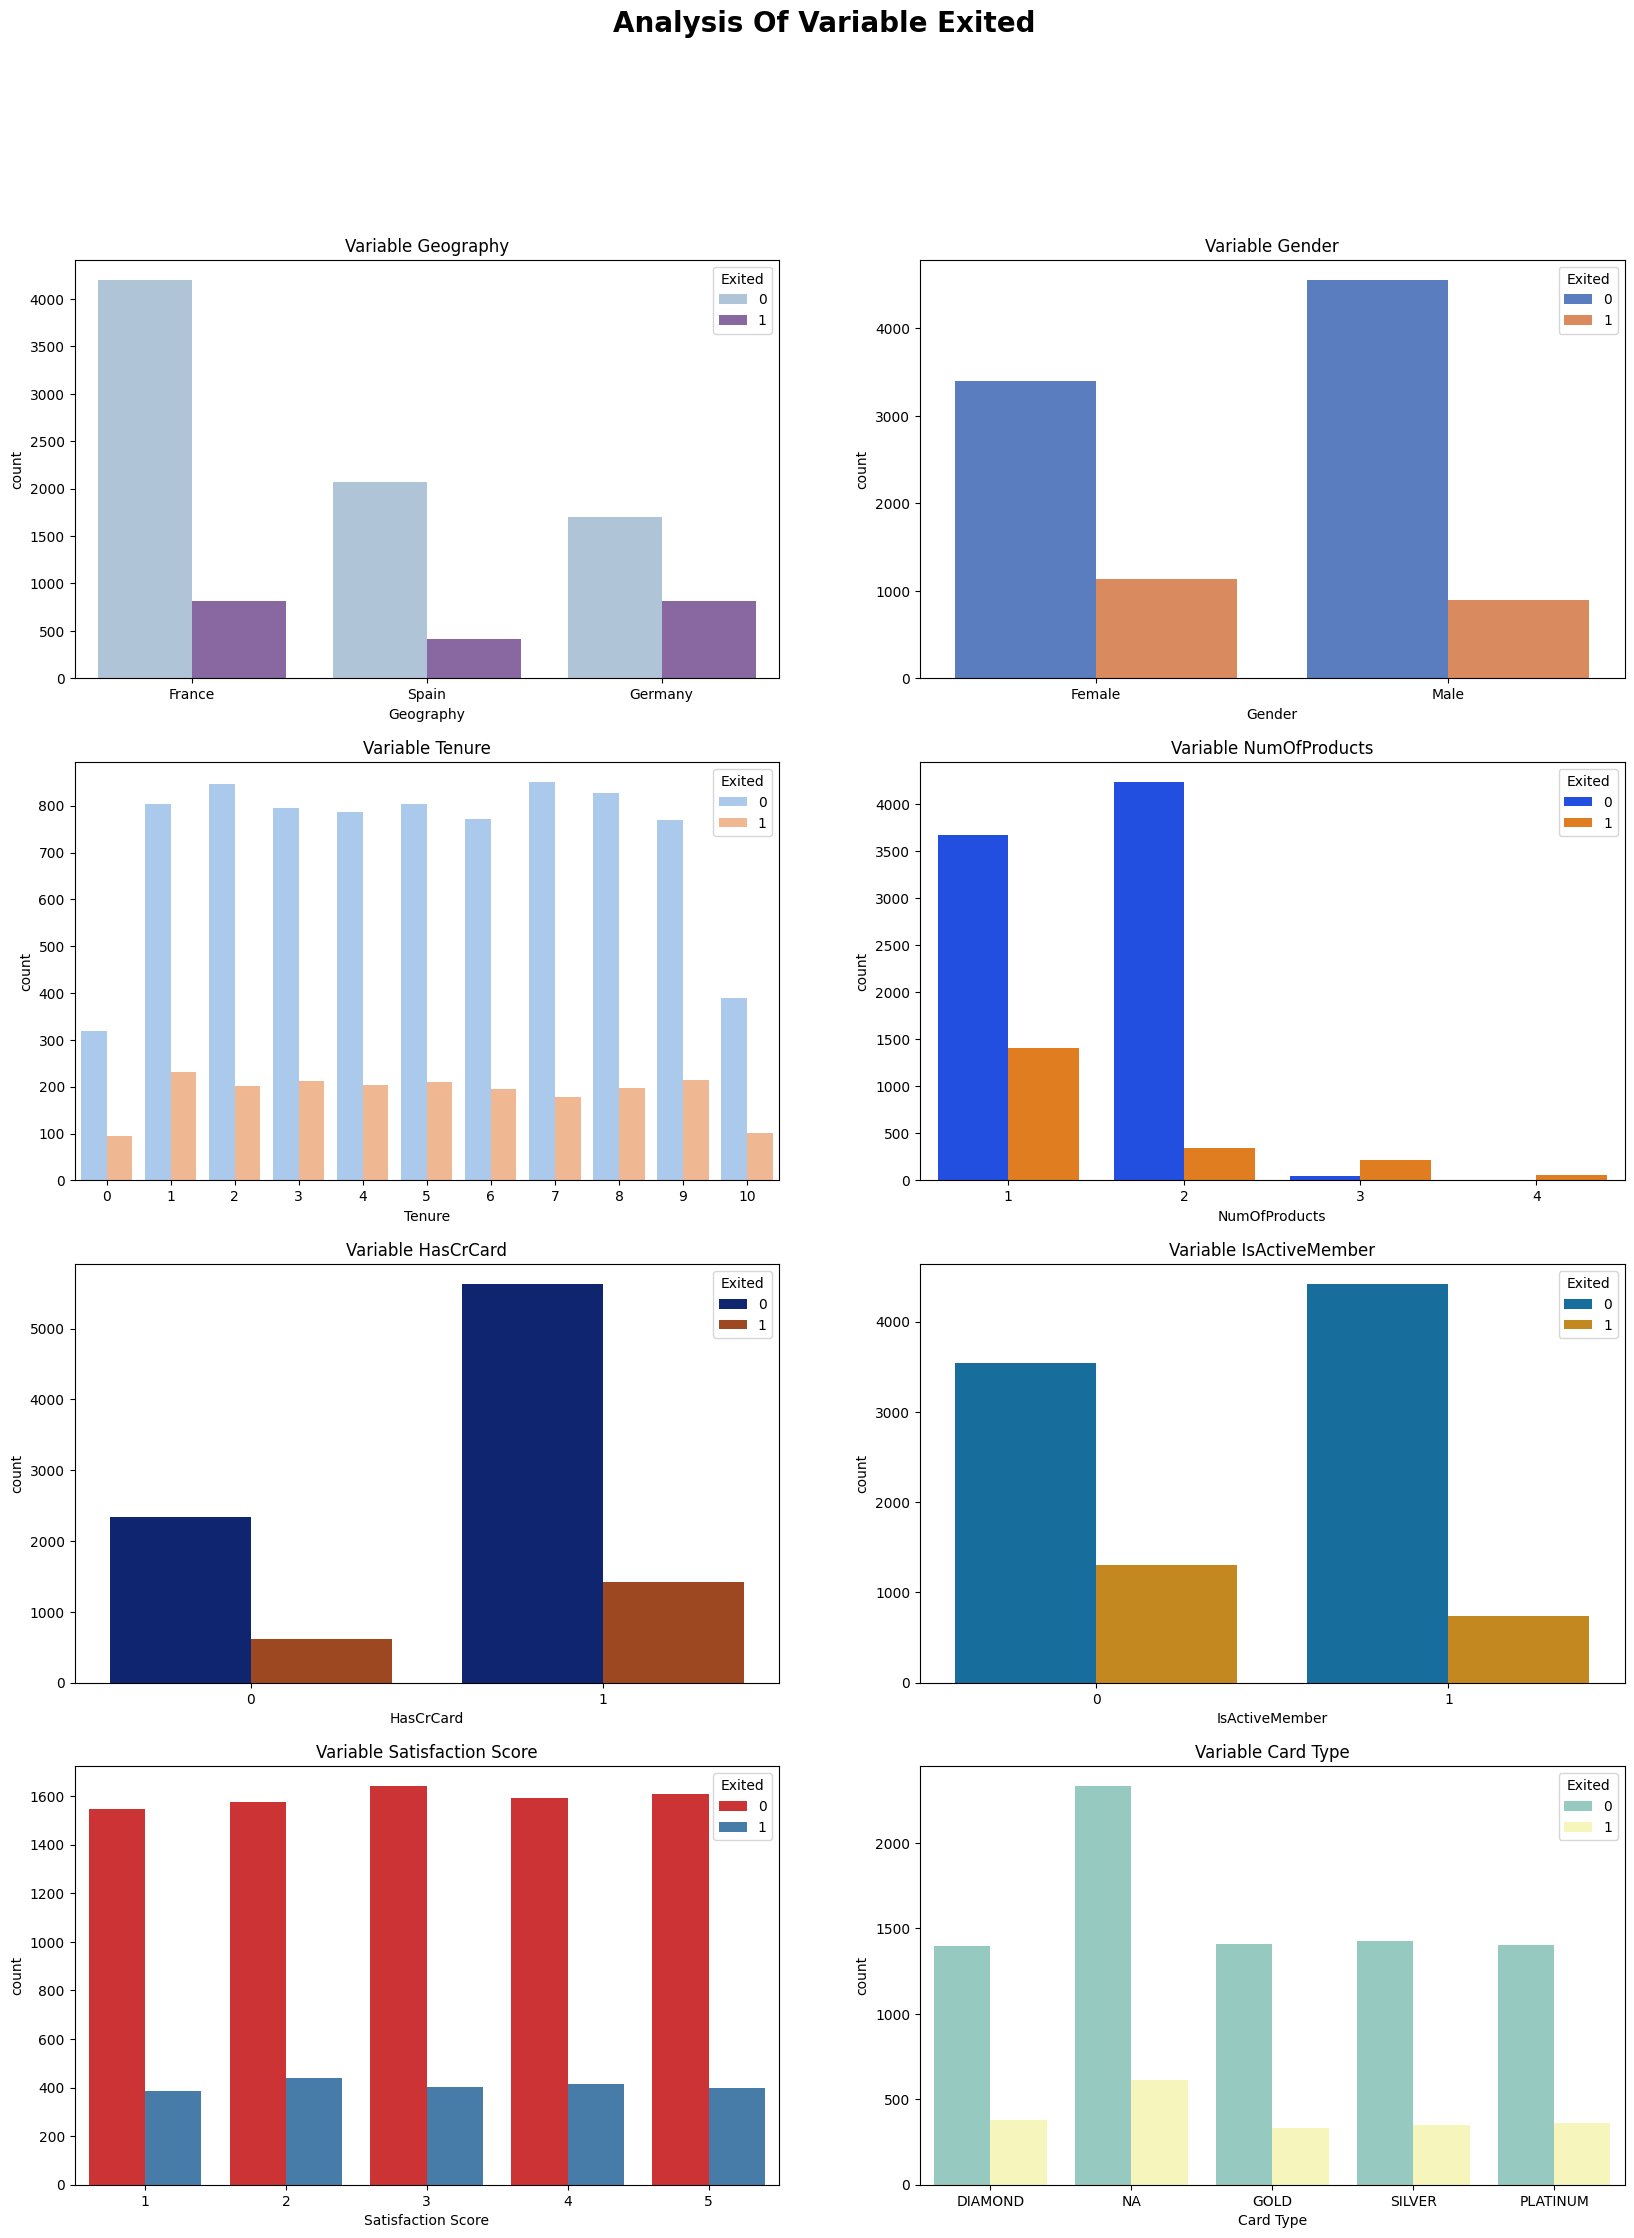

In [174]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable Exited",fontweight="bold", fontsize=20)

plt.subplot(4, 2, 1)
plt.gca().set_title('Variable Geography')
sns.countplot(x = 'Geography', hue = 'Exited', palette = 'BuPu', data = dataset)

plt.subplot(4, 2, 2)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', hue = 'Exited', palette = 'muted', data = dataset)

plt.subplot(4, 2, 3)
plt.gca().set_title('Variable Tenure')
sns.countplot(x = 'Tenure', hue = 'Exited', palette = 'pastel', data = dataset)

plt.subplot(4, 2, 4)
plt.gca().set_title('Variable NumOfProducts')
sns.countplot(x = 'NumOfProducts', hue = 'Exited', palette = 'bright', data = dataset)

plt.subplot(4, 2, 5)
plt.gca().set_title('Variable HasCrCard')
sns.countplot(x = 'HasCrCard', hue = 'Exited', palette = 'dark', data = dataset)

plt.subplot(4, 2, 6)
plt.gca().set_title('Variable IsActiveMember')
sns.countplot(x = 'IsActiveMember', hue = 'Exited', palette = 'colorblind', data = dataset)

plt.subplot(4, 2, 7)
plt.gca().set_title('Variable Satisfaction Score')
sns.countplot(x = 'Satisfaction Score', hue = 'Exited', palette = 'Set1', data = dataset)

plt.subplot(4, 2, 8)
plt.gca().set_title('Variable Card Type')
sns.countplot(x = 'Card Type', hue = 'Exited', palette = 'Set3', data = dataset)

<Axes: xlabel='Exited', ylabel='Point Earned'>

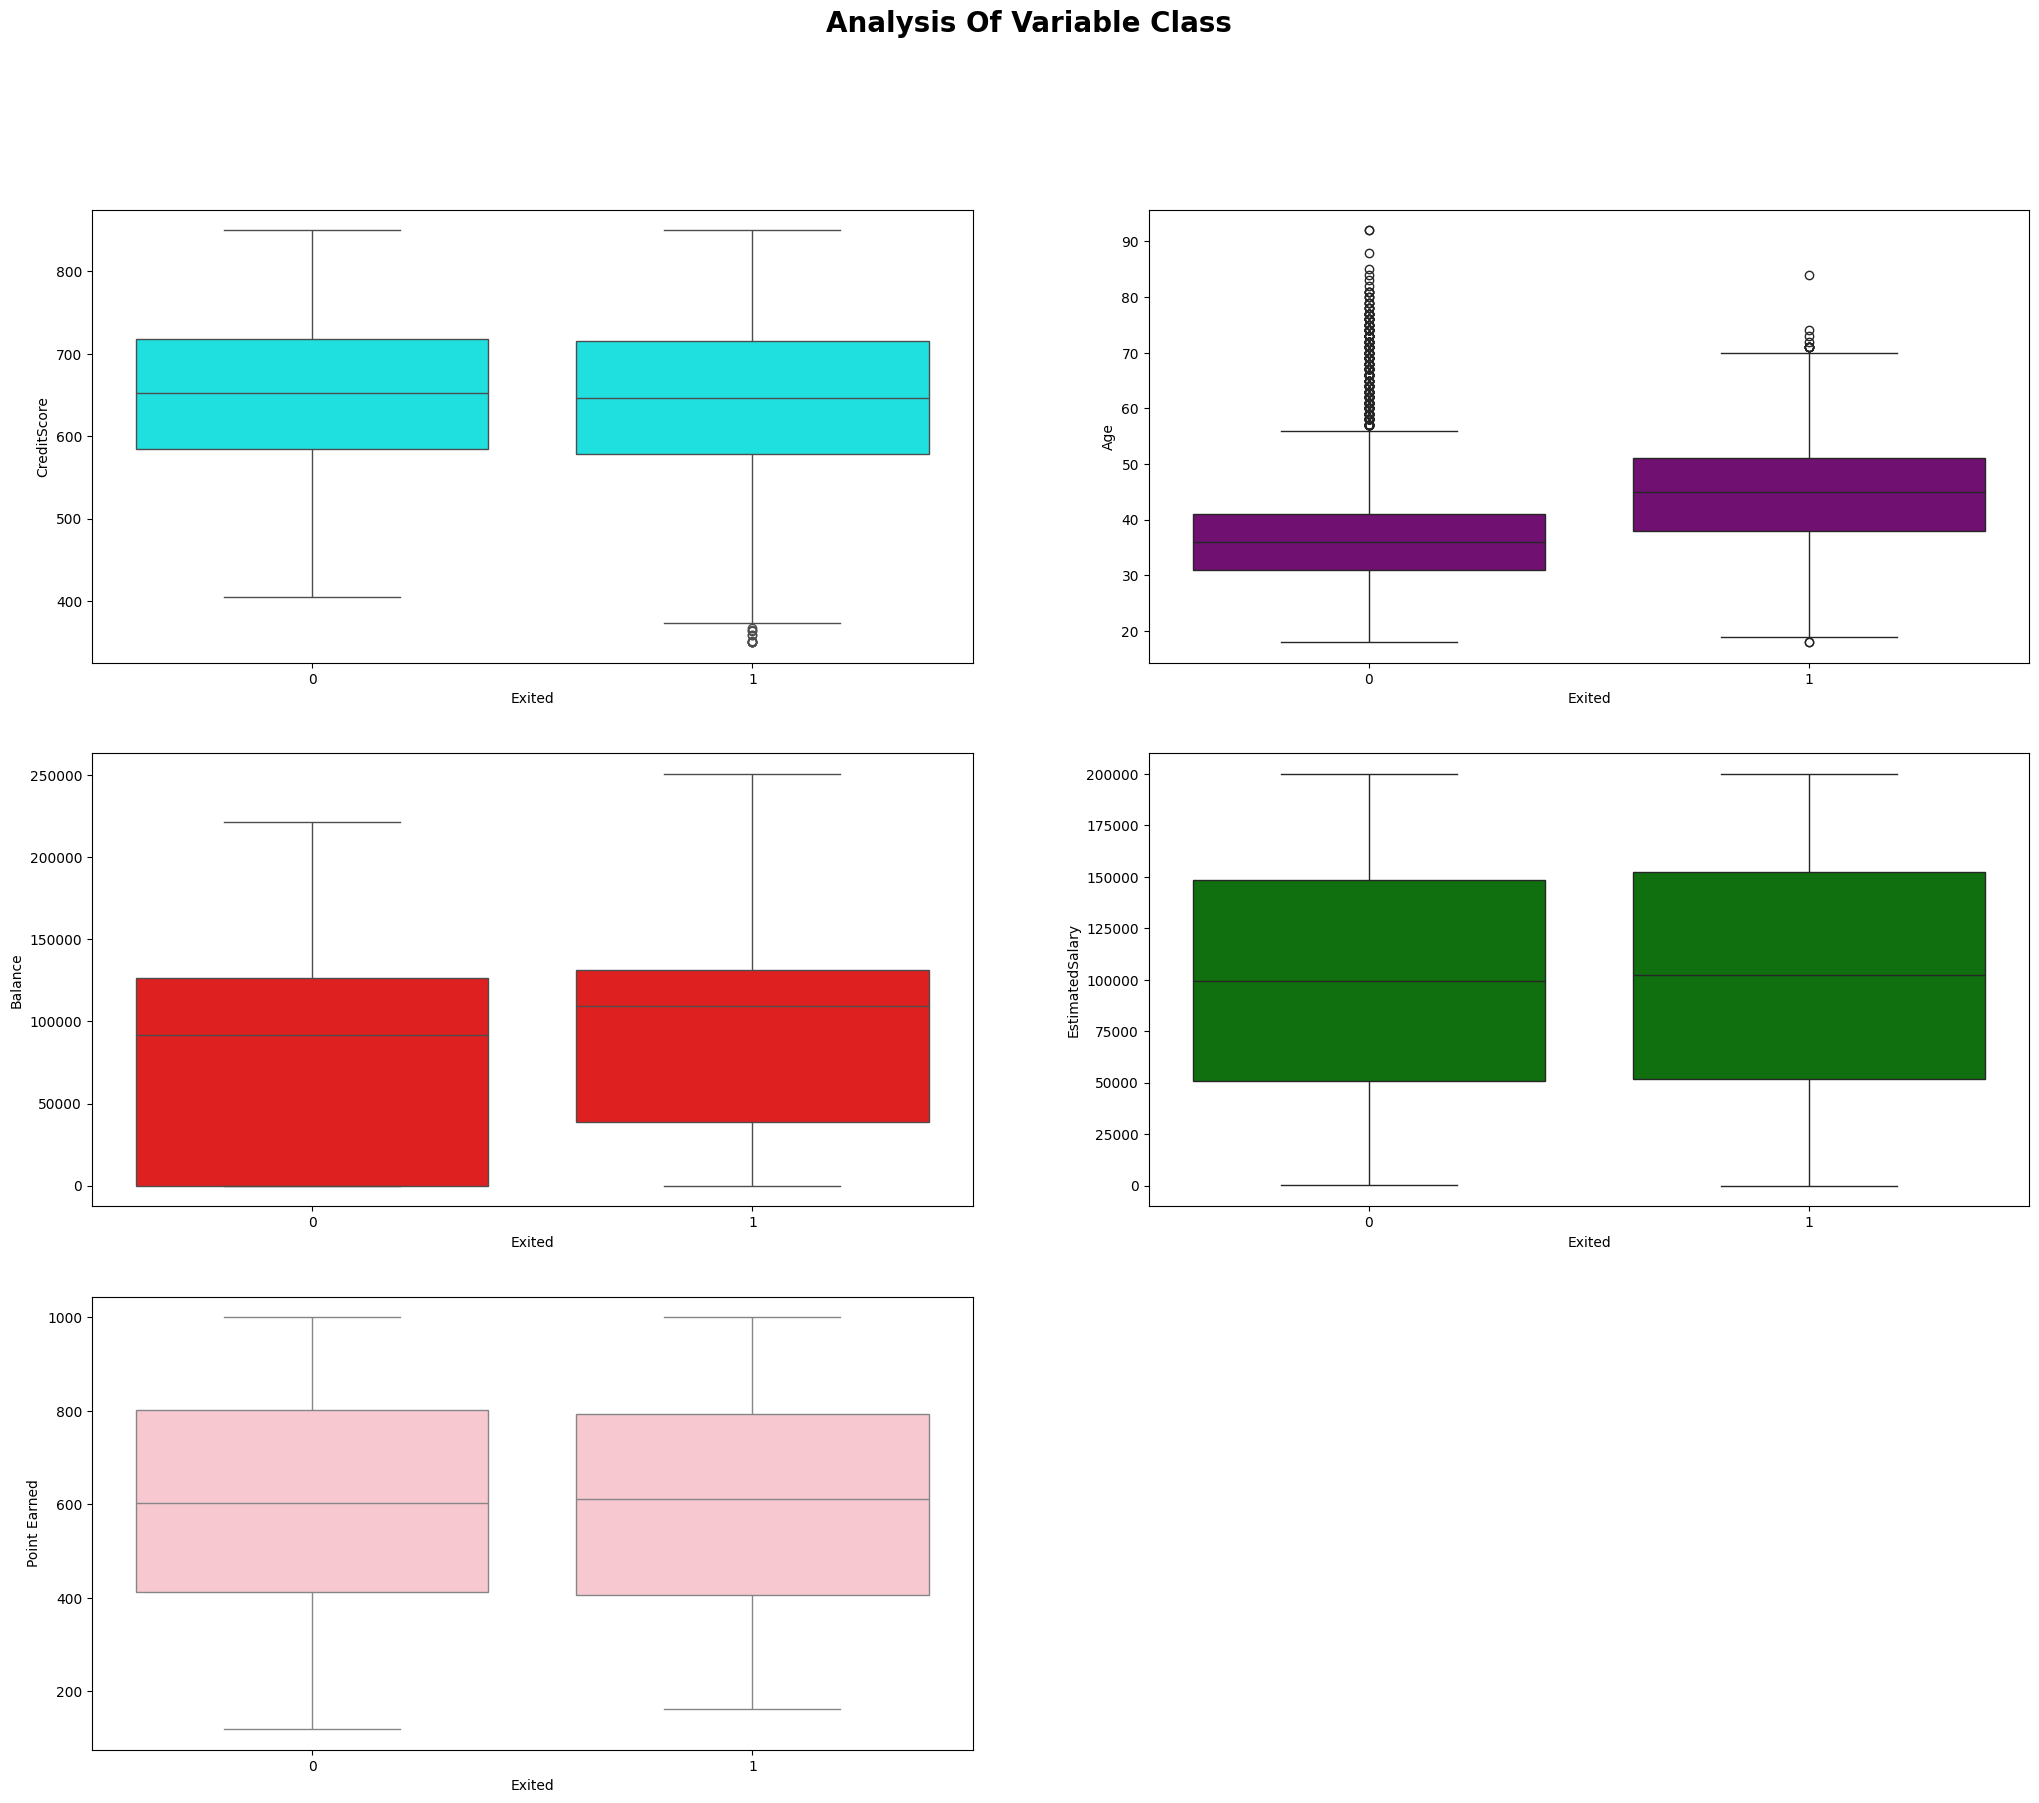

In [175]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable Class",fontweight="bold", fontsize=20)

plt.subplot(3,2,1)
sns.boxplot(x="Exited", y="CreditScore", data=dataset, color='cyan')

plt.subplot(3,2,2)
sns.boxplot(x="Exited", y="Age", data=dataset, color='purple')

plt.subplot(3,2,3)
sns.boxplot(x="Exited", y="Balance", data=dataset, color='red')

plt.subplot(3,2,4)
sns.boxplot(x="Exited", y="EstimatedSalary", data=dataset, color='green')

plt.subplot(3,2,5)
sns.boxplot(x="Exited", y="Point Earned", data=dataset, color='pink')

In [176]:
import plotly.express as px

fig = px.parallel_coordinates(dataset,color="Age",
                              labels={"CreditScore": "CrScore",
                                      "Age": "Age",
                                      "Tenure": "Tenure",
                                      "Balance": "Balance",
                                      "NumOfProducts": "Nproducts",
                                      "HasCrCard": "CrCard",
                                      "IsActiveMember": "Active",
                                      "EstimatedSalary": "Salary",
                                      "Exited": "Exited"},
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

In [177]:
card_gen = dataset[['Gender', 'Card Type']]
card_gen.head(3)

,Gender,Card Type
0,Female,DIAMOND
1,Female,NA
2,Female,DIAMOND


In [178]:
male_cards = card_gen[card_gen['Gender'] == "Male"]
male_cards_final = male_cards['Card Type'].value_counts()
male_cards_final = pd.DataFrame(male_cards_final)
male_cards_final

,count
Card Type,
NA,1594
GOLD,1022
SILVER,951
PLATINUM,946
DIAMOND,944


In [179]:
female_cards = card_gen[card_gen['Gender'] == "Female"]
female_cards_final = female_cards['Card Type'].value_counts()
female_cards_final = pd.DataFrame(female_cards_final)
female_cards_final

,count
Card Type,
NA,1351
DIAMOND,831
SILVER,826
PLATINUM,818
GOLD,717


In [180]:
mf_card = pd.merge(female_cards_final, male_cards_final, on = 'Card Type')
mf_card.rename(columns={'count_y': 'Male', 'count_x': 'Female'}, inplace=True)
mf_card.reset_index(inplace = True) #very crucial
mf_card

,Card Type,Female,Male
0,NA,1351,1594
1,DIAMOND,831,944
2,SILVER,826,951
3,PLATINUM,818,946
4,GOLD,717,1022


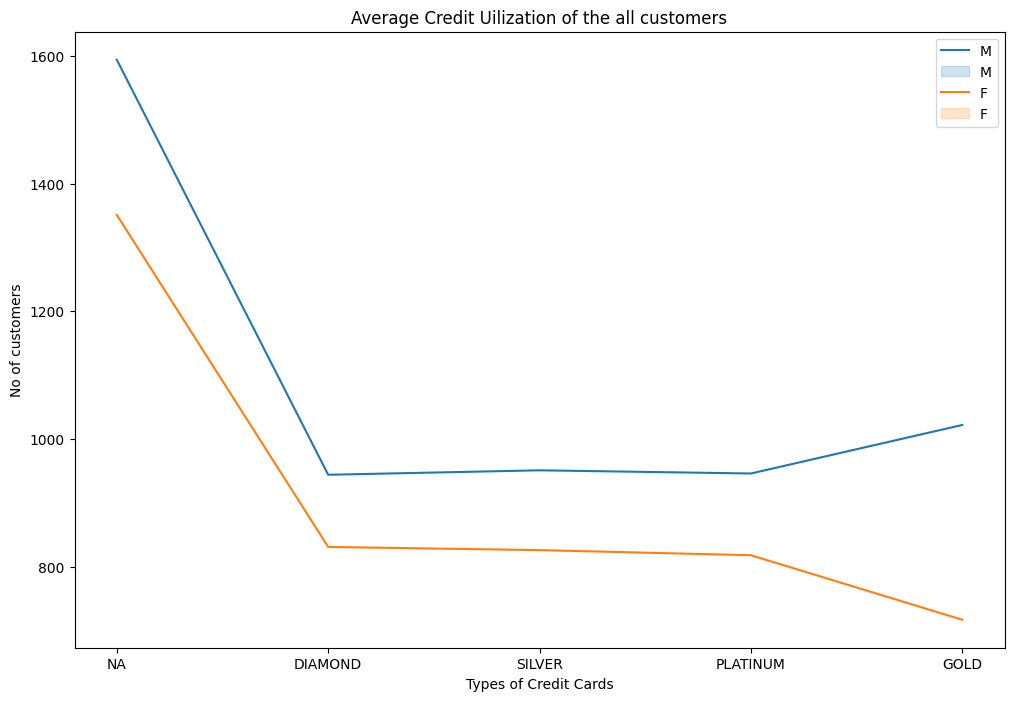

In [181]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Card Type', y = 'Male' ,data=mf_card)
sns.lineplot(x='Card Type', data=mf_card, y = 'Female')
plt.title('Average Credit Uilization of the all customers')
plt.xlabel('Types of Credit Cards')
plt.ylabel('No of customers')
plt.legend('MMFF')
plt.show()

In [182]:
c_age = dataset[['Age', 'EstimatedSalary','Card Type']]
c_age.sample(3)

,Age,EstimatedSalary,Card Type
2434,52,113266.28,PLATINUM
7182,49,107472.99,NA
3565,30,157888.50,NA


In [183]:
bins1 = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100] #bins are left closed right open
c_age['Age'] = pd.cut(c_age['Age'], bins=bins1)
c_age.sample(4)

<ipython-input-183-758d8aa5a0e1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Age,EstimatedSalary,Card Type
5271,"(30, 40]",138564.48,GOLD
6756,"(30, 40]",85937.52,DIAMOND
5319,"(20, 30]",93073.04,DIAMOND
715,"(30, 40]",144517.19,GOLD


In [184]:
bins2 = [0, 25000, 50000, 75000, 100000, 125000, 150000, 200000]
c_age['EstimatedSalary'] = pd.cut(c_age['EstimatedSalary'], bins=bins2)
c_age.sample(4)

<ipython-input-184-a4de3a687c51>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Age,EstimatedSalary,Card Type
3667,"(30, 40]","(50000, 75000]",NA
8654,"(40, 50]","(25000, 50000]",GOLD
8507,"(30, 40]","(75000, 100000]",PLATINUM
8611,"(20, 30]","(0, 25000]",DIAMOND


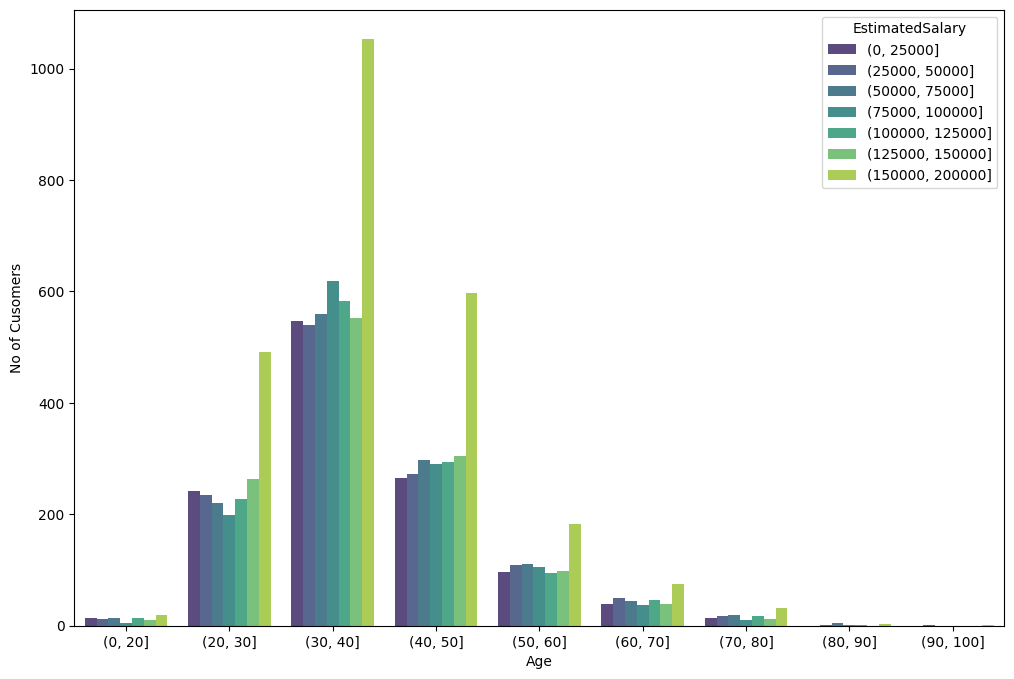

In [185]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Age',data=c_age, palette = 'viridis', hue = 'EstimatedSalary', alpha = 0.9)
plt.ylabel('No of Cusomers');

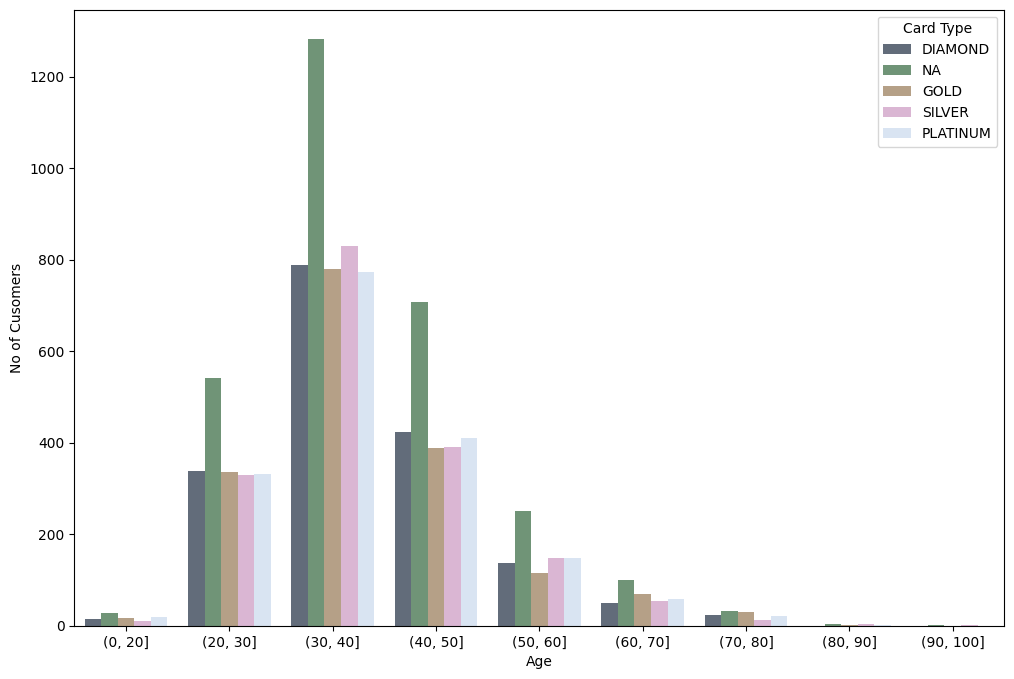

In [186]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Age',data=c_age, palette = 'cubehelix', hue = 'Card Type', alpha = 0.7)
plt.ylabel('No of Cusomers');

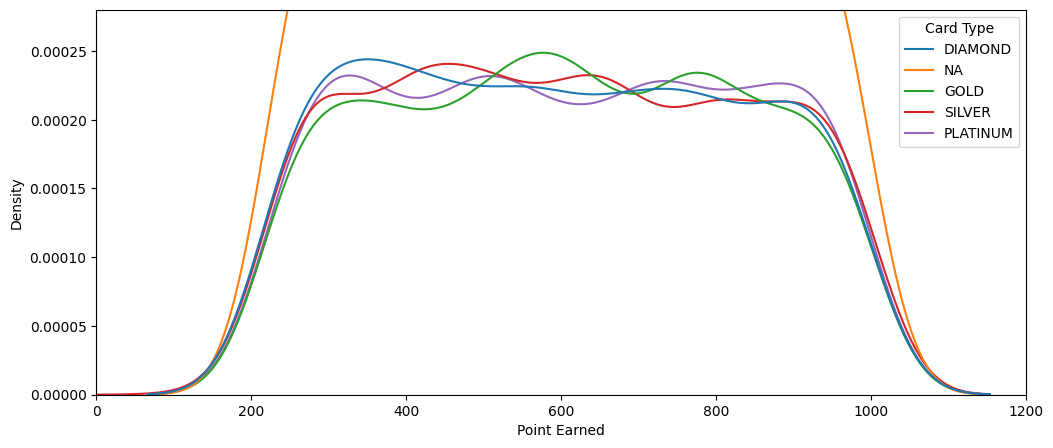

In [246]:
plt.figure(figsize = (12,5))
sns.kdeplot(data = dataset, x = 'Point Earned', hue = 'Card Type' )
plt.xlim(0, 1200)
plt.ylim(0, 0.00028);

In [188]:
c_age1 = dataset[['Age', 'EstimatedSalary','Card Type', 'CreditScore']]
c_age1.sample(3)

,Age,EstimatedSalary,Card Type,CreditScore
7392,67,138350.74,PLATINUM,596
9709,57,84475.13,GOLD,575
6768,42,113868.40,SILVER,599


<Axes: xlabel='CreditScore', ylabel='Density'>

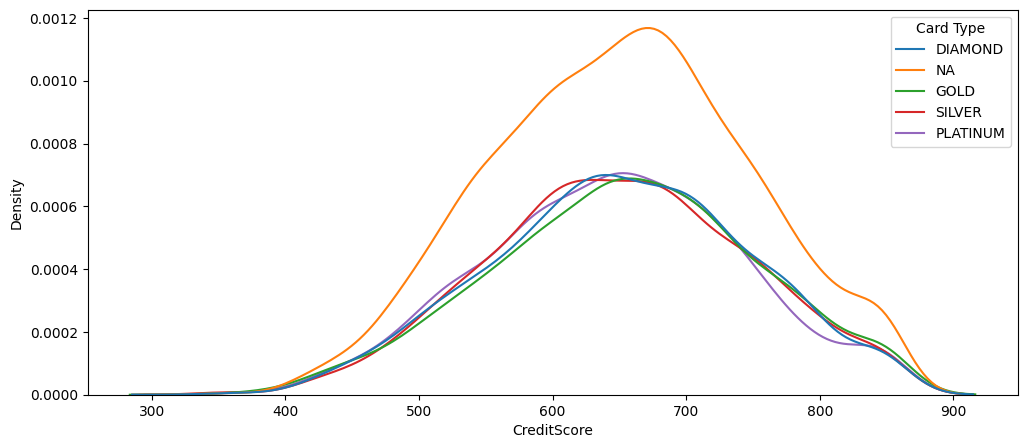

In [189]:
plt.figure(figsize = (12,5))
sns.kdeplot(data = dataset, x = 'CreditScore', hue = 'Card Type' )

In [190]:
#reomoving complain
dataset =  dataset.drop(columns=['Complain'])

In [191]:
#split into train and test datasets
train_df , test_df = train_test_split(dataset , test_size= 0.3 , random_state=42)

In [192]:
#identifying inputs columns
input_cols = train_df.drop(columns="Exited")
input_cols = list(input_cols.columns)
input_cols

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Satisfaction Score',
 'Card Type',
 'Point Earned']

In [193]:
#identifying target columns
target_cols = "Exited"

In [194]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_cols]
test_inputs = test_df[input_cols]
test_targets = test_df[target_cols]
#finding numeric columns
numeric_cols = train_inputs.select_dtypes(include = np.number). columns.tolist()

In [195]:
#finding categorical columns
categ_cols = train_inputs.select_dtypes("object"). columns.tolist()

In [196]:
#scaling numeric features
#applying minmax scaling
scaler = MinMaxScaler()
scaler.fit(dataset[numeric_cols])
#list(scaler.data_min_)
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

<ipython-input-196-6dd700a489a2>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-196-6dd700a489a2>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [197]:
#encoding categorical data
encoder = OneHotEncoder(sparse = False , handle_unknown= 'ignore')
encoder.fit(dataset[categ_cols])
encoded_cols = list(encoder.get_feature_names_out(categ_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categ_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categ_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [198]:
x_train = train_inputs[numeric_cols + encoded_cols]
x_test = test_inputs[numeric_cols + encoded_cols]

In [199]:
#imbalancing
# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state = 42)
# Resample the data
X_train_resampled, y_train_resampled = oversampler.fit_resample(x_train,train_targets )

In [200]:
#logistic regression
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

In [201]:
#making prediction of test
test_preds = model.predict(x_test)
test_preds

array([1, 0, 1, ..., 0, 0, 0])

In [231]:
#accuracy of test
score_logistic = accuracy_score(test_targets, test_preds)
print(score_logistic)

0.704


In [203]:
cm = confusion_matrix(test_targets, test_preds)

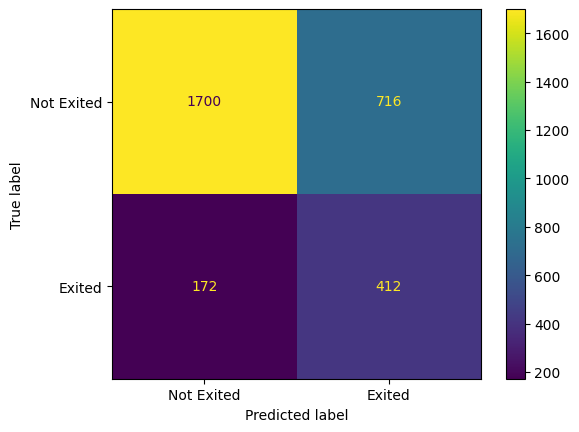

In [204]:
# Import the ConfusionMatrixDisplay class
# Create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Exited", "Exited"])

# Display the confusion matrix
cm_display.plot()

In [205]:
#report
classification_logistic = classification_report(test_targets, test_preds)
print(classification_logistic)

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      2416
           1       0.37      0.71      0.48       584

    accuracy                           0.70      3000
   macro avg       0.64      0.70      0.64      3000
weighted avg       0.80      0.70      0.73      3000



In [206]:
# KNN algorithm
# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

# Fit KNN classifier to the training data
knn.fit(x_train, train_targets)

# Making predictions on the testing set
y_pred_knn = knn.predict(x_test)
# Calculating accuracy of the KNN model
c = accuracy_score(test_targets, y_pred_knn)
print("Accuracy of KNN model:", accuracy_knn)

Accuracy of KNN model: 0.8033333333333333


In [ ]:
#confusion matrix
cm = confusion_matrix(test_targets, y_pred_knn)

# Create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Exited", "Exited"])

# Display the confusion matrix
cm_display.plot()

In [207]:
#report
classification_knn = classification_report(test_targets, y_pred_knn)
print(classification_knn)

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2416
           1       0.47      0.08      0.13       584

    accuracy                           0.80      3000
   macro avg       0.64      0.53      0.51      3000
weighted avg       0.75      0.80      0.74      3000



In [208]:
#Decision treee
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier()

In [209]:
test_preds_dt = model_dt.predict(x_test)
test_preds_dt

array([0, 0, 0, ..., 0, 0, 0])

In [232]:
#checking accuracy
score_dt = accuracy_score(test_targets, test_preds_dt)
print(score_dt)

0.7956666666666666


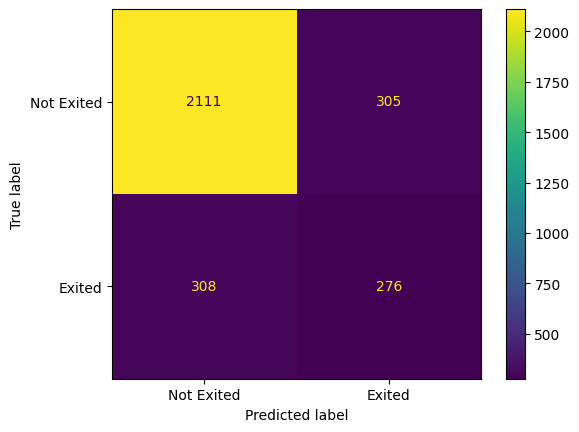

In [211]:
#confusion matrix
cm = confusion_matrix(test_targets, test_preds_dt)

# Create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Exited", "Exited"])

# Display the confusion matrix
cm_display.plot()

In [212]:
#report
classification_dtree = classification_report(test_targets, test_preds_dt)
print(classification_dtree)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2416
           1       0.48      0.47      0.47       584

    accuracy                           0.80      3000
   macro avg       0.67      0.67      0.67      3000
weighted avg       0.80      0.80      0.80      3000



[Text(0.5, 0.9, 'Age <= 0.318\ngini = 0.5\nsamples = 11092\nvalue = [5546, 5546]'),
 Text(0.25, 0.7, 'NumOfProducts <= 0.5\ngini = 0.443\nsamples = 6285\nvalue = [4201, 2084]'),
 Text(0.125, 0.5, 'NumOfProducts <= 0.167\ngini = 0.42\nsamples = 5969\nvalue = [4176, 1793]'),
 Text(0.0625, 0.3, 'Geography_Germany <= 0.5\ngini = 0.487\nsamples = 3335\nvalue = [1934, 1401]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Balance <= 0.432\ngini = 0.253\nsamples = 2634\nvalue = [2242, 392]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Balance <= 0.092\ngini = 0.146\nsamples = 316\nvalue = [25, 291]'),
 Text(0.3125, 0.3, 'EstimatedSalary <= 0.33\ngini = 0.323\nsamples = 94\nvalue = [19, 75]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'EstimatedSalary <= 0.943\ngini = 0.053\nsamples = 222\nvalue = [6, 216]'),
 Text(0.40625, 0.1, '\n  (...)  

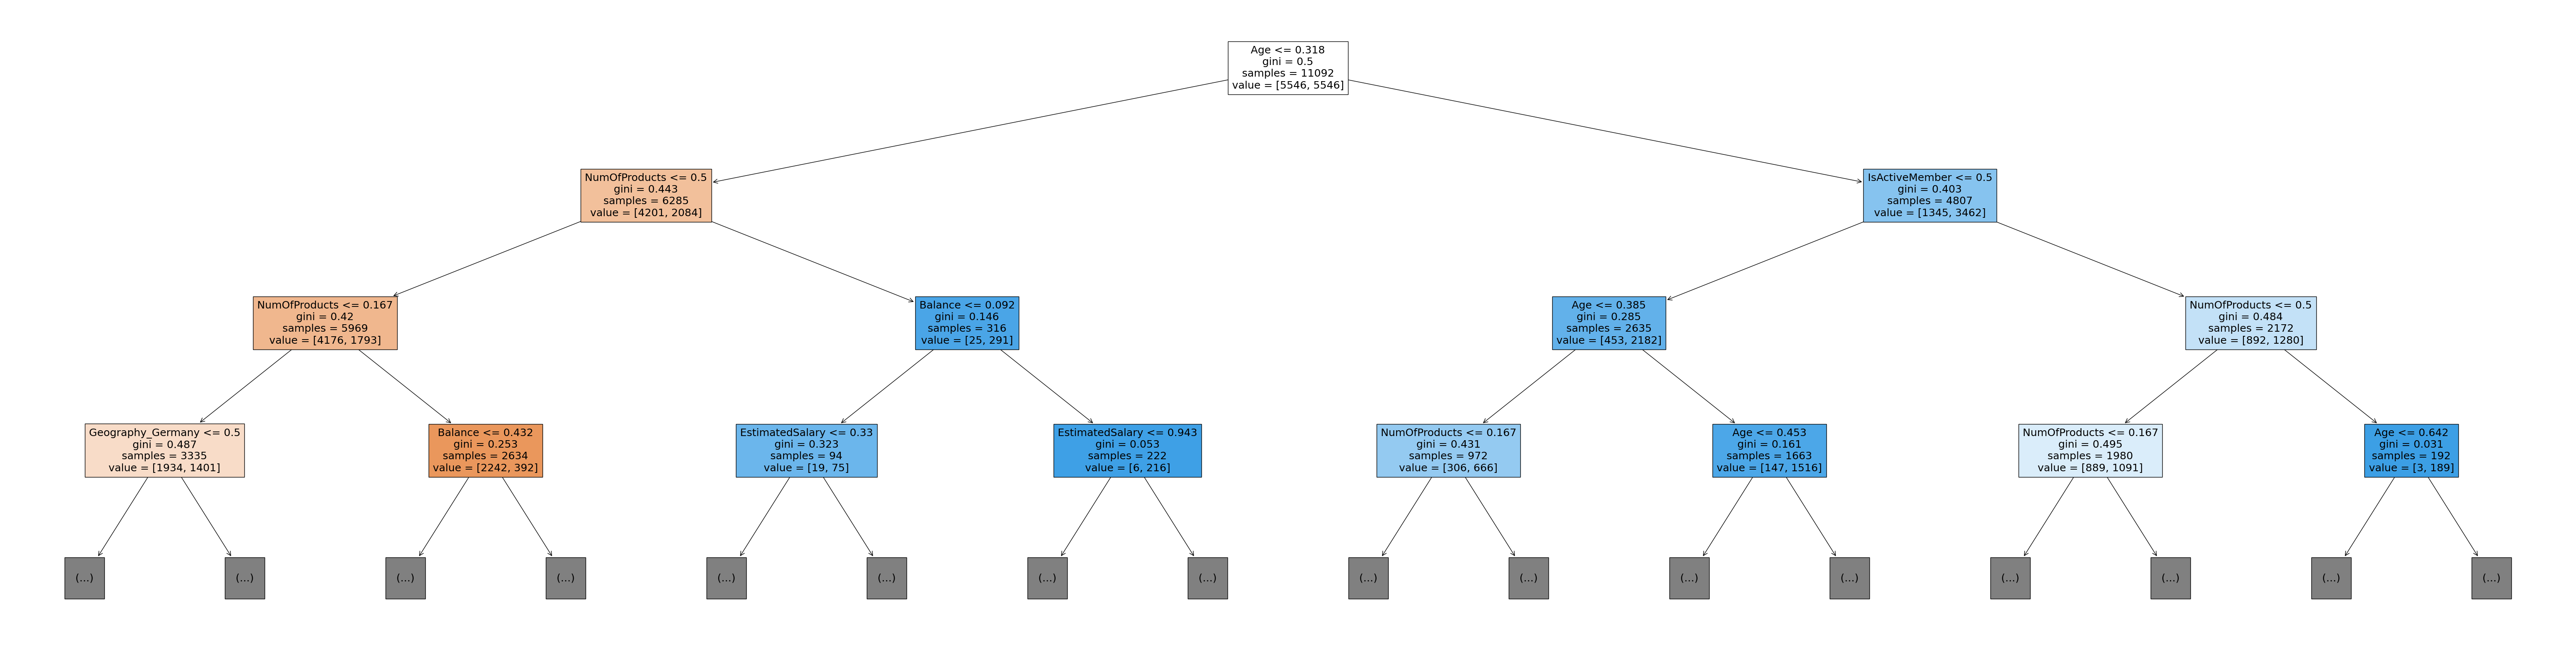

In [213]:
#we can visualize the decision tree
plt.figure(figsize = (80,20))
plot_tree(model_dt , feature_names = x_train.columns, max_depth=3 , filled = True)

In [214]:
#feature importance
# Extract feature importances
feature_importances = model_dt.feature_importances_

# Get the column names of your dataset
feature_names = x_train.columns

# Create a DataFrame with corresponding features and importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance values
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
1,Age,0.236056
3,Balance,0.135870
4,NumOfProducts,0.131383
7,EstimatedSalary,0.111533
9,Point Earned,0.095896
0,CreditScore,0.081388
2,Tenure,0.046641
6,IsActiveMember,0.036530
8,Satisfaction Score,0.027147
11,Geography_Germany,0.022920


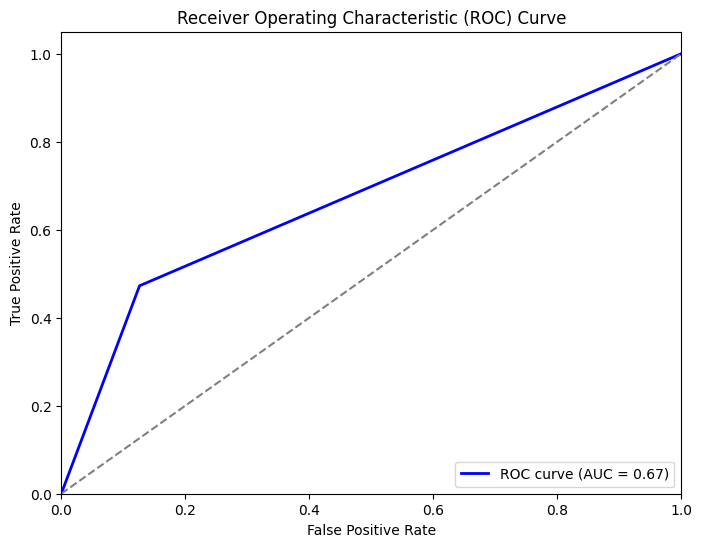

In [215]:
#ROC curve for decision tree

# Predict probabilities for positive class
y_probs = model_dt.predict_proba(x_test)[:, 1]

# Calculate false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(test_targets, y_probs)

# Calculate area under the curve (AUC)
auc_score = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [216]:
#finding best parameters
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a new variable called 'parameters' and assign the 'param_grid' dictionary to it
parameters = param_grid

# Create the RandomizedSearchCV object
model = RandomForestClassifier()
gridRandomForest = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1 , random_state= 42)

# Fit the model
gridRandomForest.fit(X_train_resampled, y_train_resampled)

# Print the results
print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Min Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)


Algorithm:  gini
Score:  0.9574477491912416
Min Split:  2
Max Nvl:  30


In [217]:
#Random forest
model_rf = RandomForestClassifier(n_estimators = 1000, min_samples_split = 5, max_depth= 20,  criterion = 'gini', random_state = 42)
model_rf.fit(X_train_resampled, y_train_resampled)
test_preds_rf = model_rf.predict(x_test)
test_preds_rf

array([0, 0, 0, ..., 0, 0, 0])

In [233]:
#checking accuracy
score_rf = accuracy_score(test_targets, test_preds_rf)
print(score_rf)

0.8613333333333333


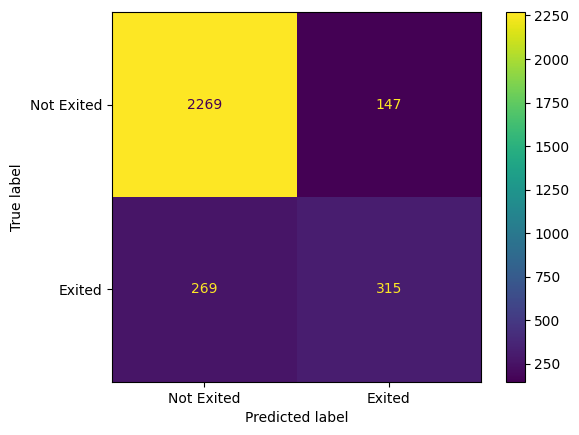

In [219]:
#confusion matrix
cm = confusion_matrix(test_targets, test_preds_rf)
cm

# Create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Exited", "Exited"])

# Display the confusion matrix
cm_display.plot()

In [220]:
#report
classification_rf = classification_report(test_targets, test_preds_rf)
print(classification_rf)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      2416
           1       0.68      0.54      0.60       584

    accuracy                           0.86      3000
   macro avg       0.79      0.74      0.76      3000
weighted avg       0.85      0.86      0.85      3000



In [221]:
#feature importance
# Extract feature importances
feature_importances = model_rf.feature_importances_

# Get the column names of your dataset
feature_names = x_train.columns

# Create a DataFrame with corresponding features and importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance values
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
1,Age,0.229935
4,NumOfProducts,0.121136
3,Balance,0.107864
9,Point Earned,0.097301
7,EstimatedSalary,0.095395
0,CreditScore,0.093683
2,Tenure,0.058619
8,Satisfaction Score,0.039910
6,IsActiveMember,0.033881
11,Geography_Germany,0.022201


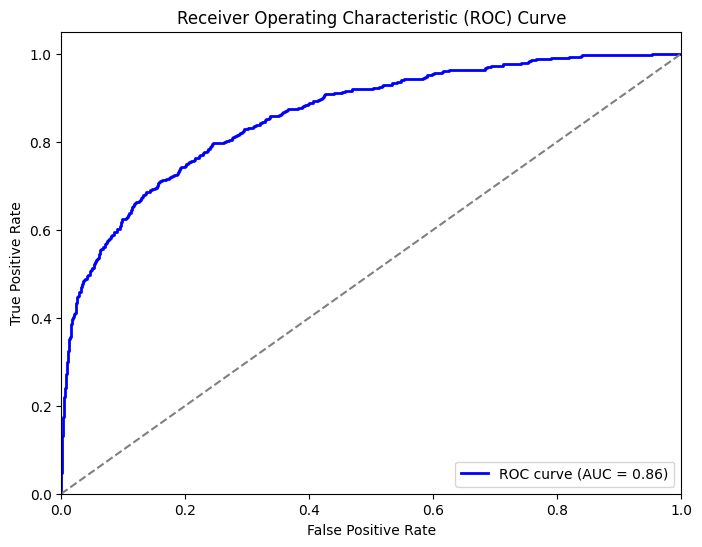

In [222]:
#ROC curve for random forest
# Predict probabilities for positive class
y_probs = model_rf.predict_proba(x_test)[:, 1]

# Calculate false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(test_targets, y_probs)

# Calculate area under the curve (AUC)
auc_score = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [223]:
# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1],
    'kernel': ['linear', 'rbf' ]
}
# Create a new variable called 'parameters' and assign the 'param_grid' dictionary to it
parameters = param_grid

# Create the RandomizedSearchCV object
model = SVC()
grid_search = RandomizedSearchCV(model,parameters, cv=5, n_jobs = -1 , random_state=42)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print('kernel: ', grid_search.best_estimator_.kernel)
print('Score: ', grid_search.best_score_)
print('gamma: ', grid_search.best_estimator_.gamma)
print('C: ', grid_search.best_estimator_.C)


Algorithm:  rbf
Score:  0.7656858486283922
Min Split:  0.1
Max Nvl:  10


In [224]:
#SVM
svm_model = svm.SVC(kernel='rbf', gamma=0.1,  C = 10 , probability= True , random_state= 42 )

# Fit the SVM model to the training data
svm_model.fit(x_train, train_targets)

SVC(C=10, gamma=0.1, probability=True, random_state=42)

In [225]:
#SVM
svm_model2 = svm.SVC(kernel='linear', gamma=0.1,  C = 10 , probability= True , random_state= 42 )

# Fit the SVM model to the training data
svm_model2.fit(x_train, train_targets)

SVC(C=10, gamma=0.1, kernel='linear', probability=True, random_state=42)

In [234]:
y_predict = svm_model.predict(x_test)
#checking accuracy
score_svm = accuracy_score(test_targets, y_predict)
print(score_svm)

0.849


In [227]:
#accuracy for second model
y_predict2 = svm_model2.predict(x_test)
#checking accuracy
accuracy_score(test_targets, y_predict2)

0.8053333333333333

In [228]:
# Import the necessary module
# Print the classification report for the SVM model
print(classification_report(test_targets, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2416
           1       0.86      0.27      0.41       584

    accuracy                           0.85      3000
   macro avg       0.85      0.63      0.66      3000
weighted avg       0.85      0.85      0.82      3000



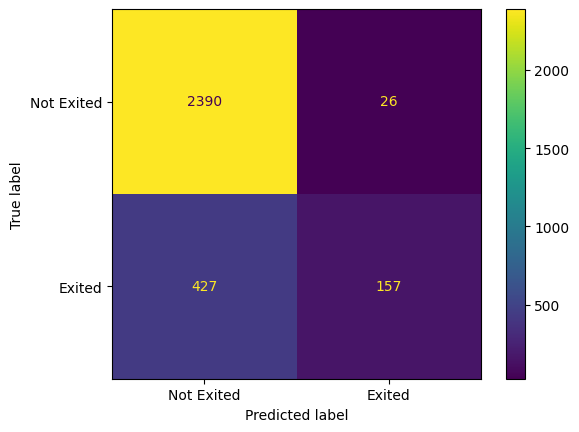

In [229]:
#confusion matrix
cm = confusion_matrix(test_targets, y_predict)
cm
# Create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Exited", "Exited"])

# Display the confusion matrix
cm_display.plot()

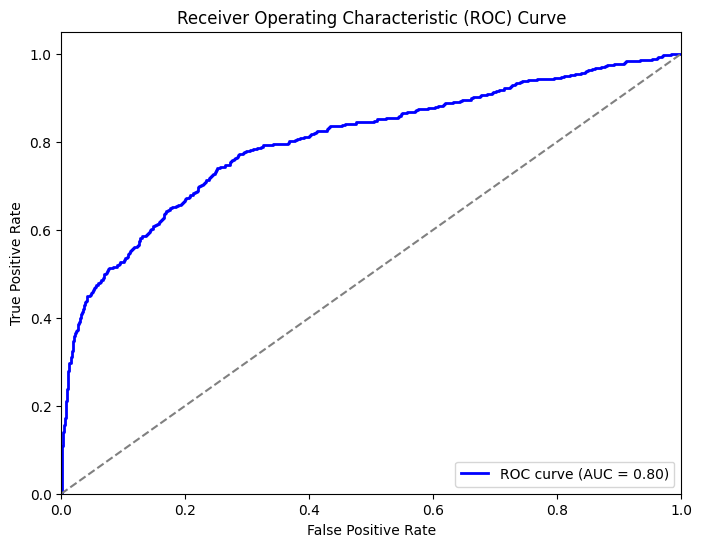

In [230]:
#ROC curve for SVM
# Predict probabilities for positive class
y_probs = svm_model.predict_proba(x_test)[:, 1]

# Calculate false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(test_targets, y_probs)

# Calculate area under the curve (AUC)
auc_score = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [242]:
#comparison between all the models

Decision_dict = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_dt}

Random_dict = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_rf}

KNN_dict_v2 = {'Model':'KNN',
               'Scaling':'Normal',
               'Type':'-',
               'Precision':accuracy_knn}

Logistic_dict_v1 = {'Model':'Logistic Regression',
               'Scaling':'Normal Data',
               'Type':'-',
               'Precision':score_logistic}

svm_dict_v1 = {'Model':'SVM',
               'Scaling':'rvf',
               'Type':'-',
               'Precision':score_svm}

resume = pd.DataFrame({'Decision Tree':pd.Series(Decision_dict),
                       'Random Forest':pd.Series(Random_dict),
                       'KNN':pd.Series(KNN_dict_v2),
                       'Logistic Regression':pd.Series(Logistic_dict_v1),
                       'SVM':pd.Series(svm_dict_v1)})
resume

,Decision Tree,Random Forest,KNN,Logistic Regression,SVM
Model,Decision Tree,Random Forest,KNN,Logistic Regression,SVM
Scaling,Normal Data,Normal Data,Normal,Normal Data,rvf
Type,Gini,Gini,-,-,-
Precision,0.795667,0.861333,0.803333,0.704,0.849
